## Instantaneously coupled system:

First, we study the following system:

\begin{cases}
\begin{align*}
\varepsilon \dot{x_1} &= x_1 - \frac{{x_1^3}}{3} - y_1 + f(x_2) \\
\dot{y_1} &= x_1 + a \\
\varepsilon \dot{x_2} &= x_2 - \frac{{x_2^3}}{3} - y_2 + f(x_1) \\
\dot{y_2} &= x_2 + a \\
\end{align*}
\end{cases}

where $f$ is to be determined, for now I used $f(x) = c\tan^{-1}(x)$, $a$ is a parameter that regulates the Hopf bifurcation, and $\varepsilon$ is a small parameter that regulates the time scale separation. The short term goal is to understand how the parameters $c$ and $a$ correlate to regulate the ocurrence of the Hopf bifurcation. The long term goal is to understand how the parameters $c$ and $a$ correlate to regulate the ocurrence of the Hopf bifurcation and the emergence of synchrony.



#### System definition in sympy:

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

eps_val_for_plot = 1
c_val_for_plot = 1.0

# Constantes:
a = sp.Symbol('a', is_real=True)
c = sp.Symbol('c', is_real=True)
lam = sp.Symbol('lambda')
eps = sp.Symbol('epsilon')

f = sp.Function('f')
x1 = sp.Function('x1')
x2 = sp.Function('x2')
y1 = sp.Function('y1')
y2 = sp.Function('y2')
x = sp.Symbol('x')
t = sp.Symbol('t')

# Define the 4d system (I probably won't use this but it doesn't hurt to have):

eq1 = sp.Eq(eps*x1(t).diff(t), x1(t) - (x1(t)**3)/3 - y1(t) + f(x2(t)))
eq2 = sp.Eq(y1(t).diff(t), x1(t) + a)
eq3 = sp.Eq(eps*x2(t).diff(t), x2(t) - (x2(t)**3)/3 - y2(t) + f(x1(t)))
eq4 = sp.Eq(y2(t).diff(t), x2(t) + a)

#### Linearized system eigenvalues:

First, notice that the unique equilibrium point of the system is given by:


\begin{align*}
x_1^* &= -a \\
y_1^* &= a^3/3 - a + f(-a) \\
x_2^* &= -a \\
y_2^* &= a^3/3 - a + f(-a)\\
\end{align*}

We can then linearize the system around this equilibrium point and study the eigenvalues of the resulting matrix. Upon varying a and c, the points where the real part of any pair of eigenvalues turn positive will indicate the Hopf bifurcation points.

(-a**4 + c - sqrt(a**8 - 2*a**4*c - 4*a**4*epsilon - 2*a**4 - 8*a**2*epsilon + c**2 + 2*c - 4*epsilon + 1) + 1)/(2*epsilon*(a**2 + 1))

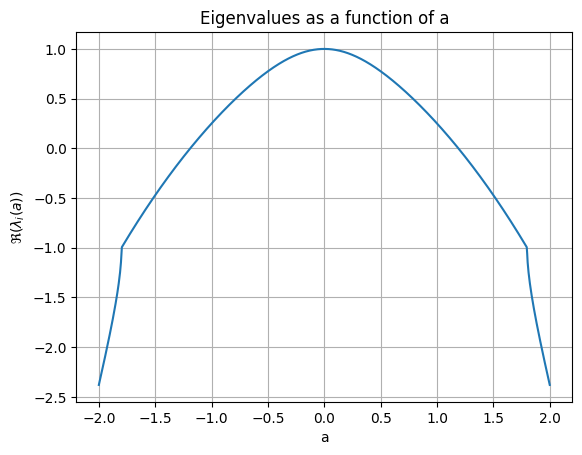

(-a**4 + c + sqrt(a**8 - 2*a**4*c - 4*a**4*epsilon - 2*a**4 - 8*a**2*epsilon + c**2 + 2*c - 4*epsilon + 1) + 1)/(2*epsilon*(a**2 + 1))

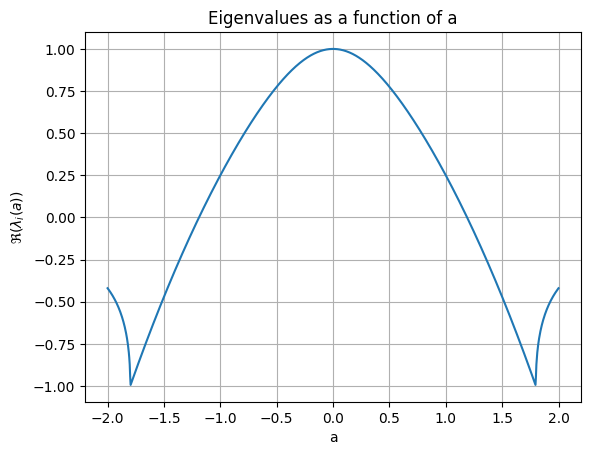

(-a**4 - c - sqrt(a**8 + 2*a**4*c - 4*a**4*epsilon - 2*a**4 - 8*a**2*epsilon + c**2 - 2*c - 4*epsilon + 1) + 1)/(2*epsilon*(a**2 + 1))

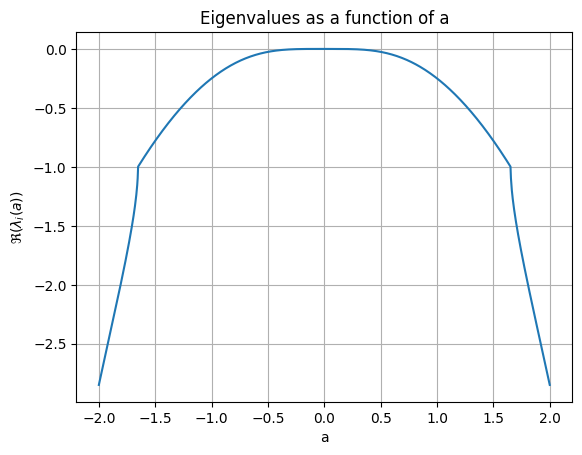

(-a**4 - c + sqrt(a**8 + 2*a**4*c - 4*a**4*epsilon - 2*a**4 - 8*a**2*epsilon + c**2 - 2*c - 4*epsilon + 1) + 1)/(2*epsilon*(a**2 + 1))

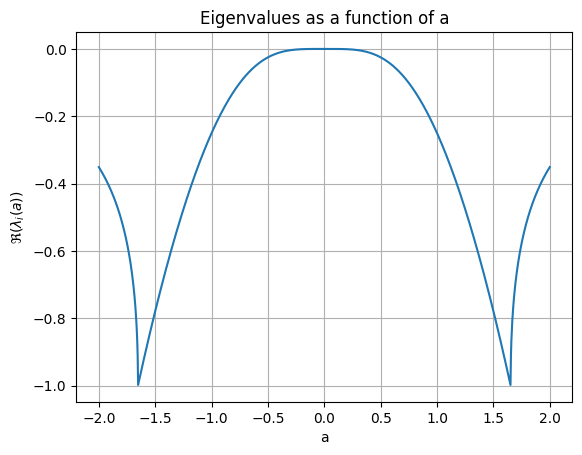

In [2]:
# Now we write the linearized system matrix:

g = f(x).diff(x).subs(x, -a)
h = g.subs(f(x), c*sp.atan(x)).doit() # We can change atan to other functions if we wish.
A = sp.Matrix([[(1 - a**2)/eps, -1/eps, h/eps, 0], [1, 0, 0, 0], [h/eps, 0, (1 - a**2)/eps, -1/eps], [0, 0, 1, 0]])

# Now find the eigenvalues of A:
eigs = A.eigenvals()

for i, eig in enumerate(eigs):
    display(eig.simplify())
    #sp.plot(eig.as_real_imag()[0].subs(eps, eps_val_for_plot).subs(c, c_val_for_plot).doit(), (a, -3, 3))
    # eig_real = eig.subs({eps: eps_val_for_plot, c: c_val_for_plot}).as_real_imag()[0].doit()
    # sp.plot(eig_real, (a, -2, 2))
    eig_real = eig.subs({eps: eps_val_for_plot, c: c_val_for_plot}).as_real_imag()[0].doit()
    eig_real = sp.simplify(eig_real)
    x_values = np.linspace(-2, 2, 1000)
    y_values = np.array([eig_real.subs(a, x) for x in x_values])
    plt.plot(x_values, y_values)
    plt.xlabel('a')
    plt.ylabel('$\Re(\lambda_{i}(a))$')
    plt.title('Eigenvalues as a function of a')
    plt.grid()
    plt.show()
